# Exploratory Analysis 

- Data Exploratory Analysis with Titanic Dataset
- Data Source: https://www.kaggle.com/c/titanic


**Import Python Libraries**

In [434]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

**Load Data**

In [435]:
data = pd.read_csv('data/titanic_data.csv',header=0)
print('Data Size: {} rows -- {} columns'.format(data.shape[0],data.shape[1]))

Data Size: 891 rows -- 12 columns


In [436]:
print('\n ** Missing Values **\n {}'.format(data.isnull().sum()))


 ** Missing Values **
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [437]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [438]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


** Survival Rate by Class**

Probability of Survival per Class


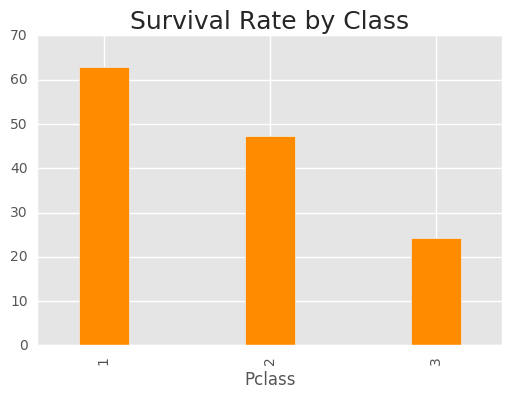

In [439]:
print('Probability of Survival per Class')
data.groupby(['Pclass']).apply(lambda x: (x['Survived'].sum() / len(x['Survived']))* 100)\
.plot(kind='bar',color='DarkOrange',width=.3)
plt.title('Survival Rate by Class',fontsize=18)

**Create New Feature 'Age_Cat' which groups ages by category**

In [440]:
data['Age_Cat'] = pd.cut(data['Age'],[0,13,21,65,1e6],labels=\
['Child','Teen','Adult','Senior Citizen']).astype(object)

**Survival Rate grouped by Passenger Class and Age Category**

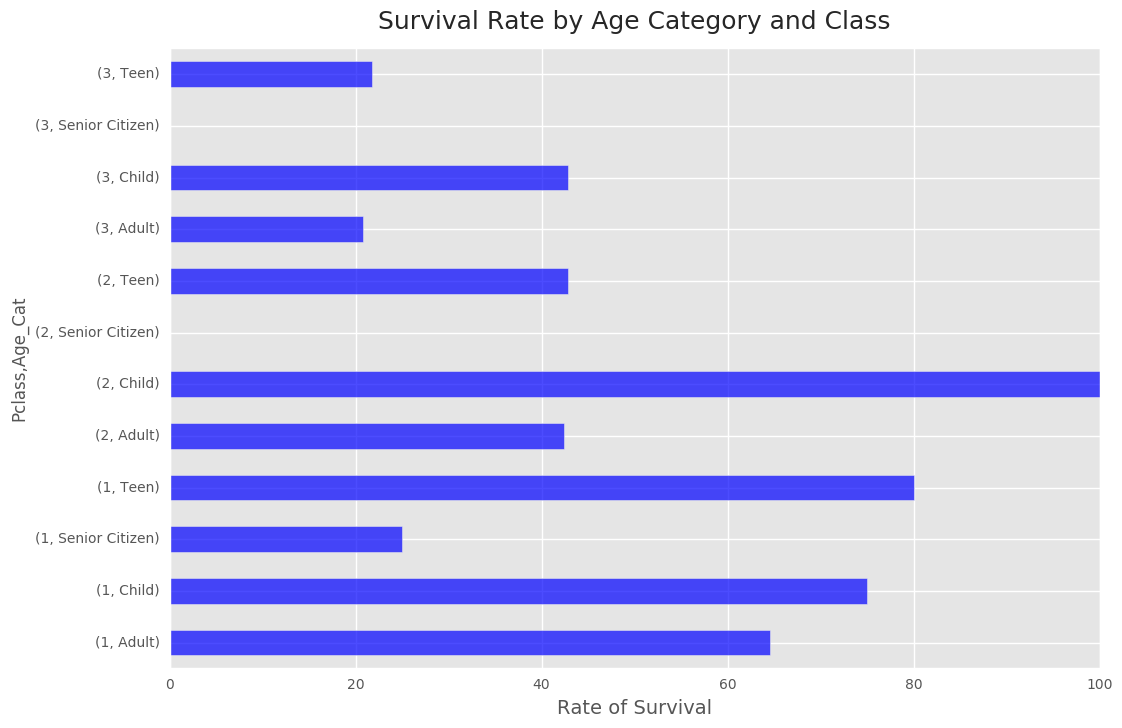

In [441]:
rate = data.groupby(['Pclass','Age_Cat'])\
.apply(lambda x: (x['Survived'].sum() / len(x['Survived']))* 100)
plt.figure(figsize=(12,8))
rate.plot(kind='barh',color='b',alpha=0.70)
plt.xlabel('Rate of Survival',fontsize=14)
plt.title('Survival Rate by Age Category and Class',fontsize=18,y=1.02)

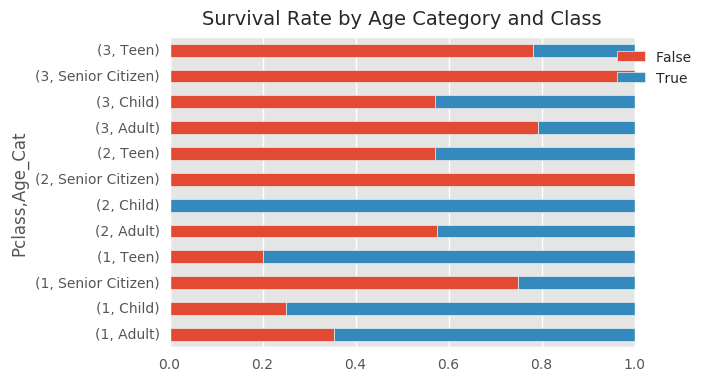

In [442]:
plt.figure(figsize=(15,8))
survival = pd.crosstab([data['Pclass'],data['Age_Cat']],data['Survived'].astype(bool))
#Normalize survival rate
survival.div(survival.sum(1).astype(float),axis=0).plot(kind='barh',stacked=True)
plt.title('Survival Rate by Age Category and Class',fontsize=14,y=1.02)
plt.legend(bbox_to_anchor=(1.15,1), loc="upper right")

**Survival by Class and Sex**

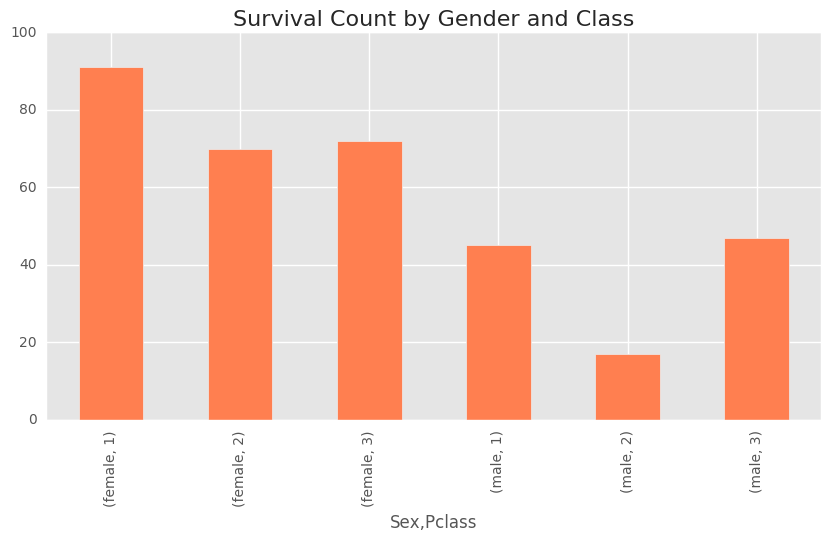

In [443]:
survival = data.groupby(['Sex','Pclass'])['Survived'].sum()
plt.figure(figsize=(10,5))
survival.plot(kind='bar',color='coral')
plt.title('Survival Count by Gender and Class',fontsize=16)

**Boxplot: Pclass by Fare**

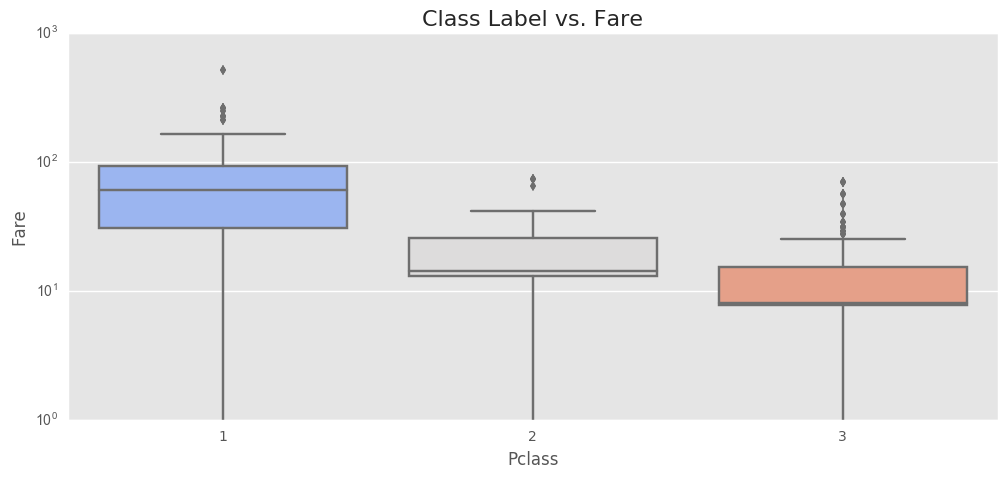

In [444]:
plt.figure(figsize=(12,5))
plt.title('Class Label vs. Fare',fontsize=16)
ax = sns.boxplot(x="Pclass", y="Fare", data=data,palette=sns.color_palette("coolwarm", 3))
ax.set_yscale('log')

**Impute Columns with Missing Values**

In [445]:
for c,r in data.iteritems():
    if r.dtype != object:
        data[c] = r.fillna(r.median())
    else:pass  

**Survival Rate grouped by Passenger Class and Age Category to see if any difference**

In [446]:
data.groupby(['Pclass','Age_Cat']).apply(lambda x: (x['Survived'].sum() / len(x['Survived']))* 100)

Pclass  Age_Cat       
1       Adult              64.556962
        Child              75.000000
        Senior Citizen     25.000000
        Teen               80.000000
2       Adult              42.424242
        Child             100.000000
        Senior Citizen      0.000000
        Teen               42.857143
3       Adult              20.754717
        Child              42.857143
        Senior Citizen      0.000000
        Teen               21.739130
dtype: float64

**Filter Out Columns with Little to No Information**

In [447]:
cols_interest = [c for c in data.columns if c not in ['PassengerId','Name','Ticket','Cabin']]
data_red = data[cols_interest]

**Correlation Heatmap**

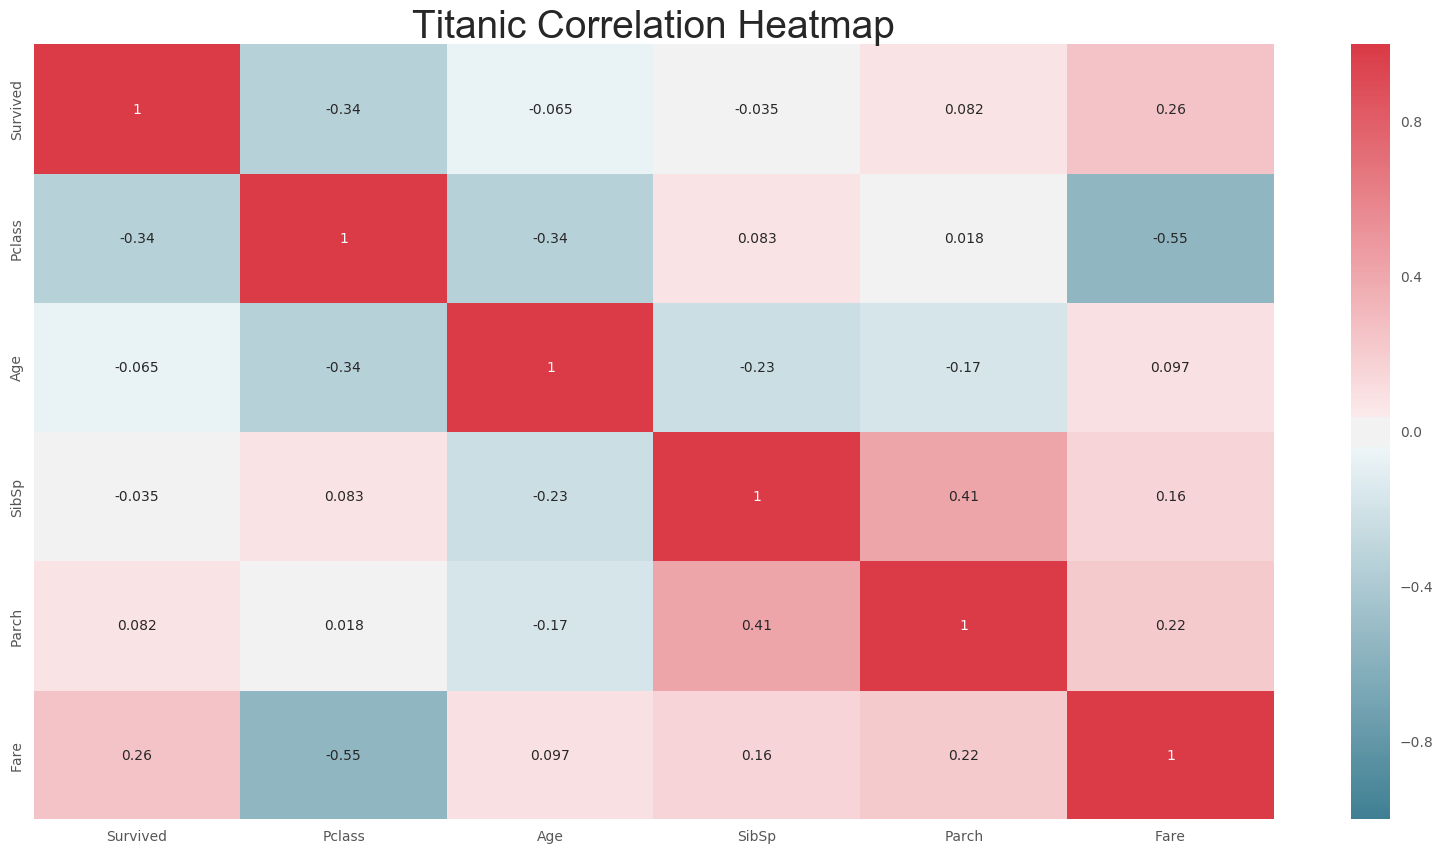

In [448]:
c = [c for c in data_red.columns if c not in ['Sex','Age_Cat','Embarked']]
corr = data_red[c].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap=sns.diverging_palette(220, 10, as_cmap=True),annot=True)
plt.title('Titanic Correlation Heatmap',fontsize=28)

** Titanic Data Scatter Matrix **

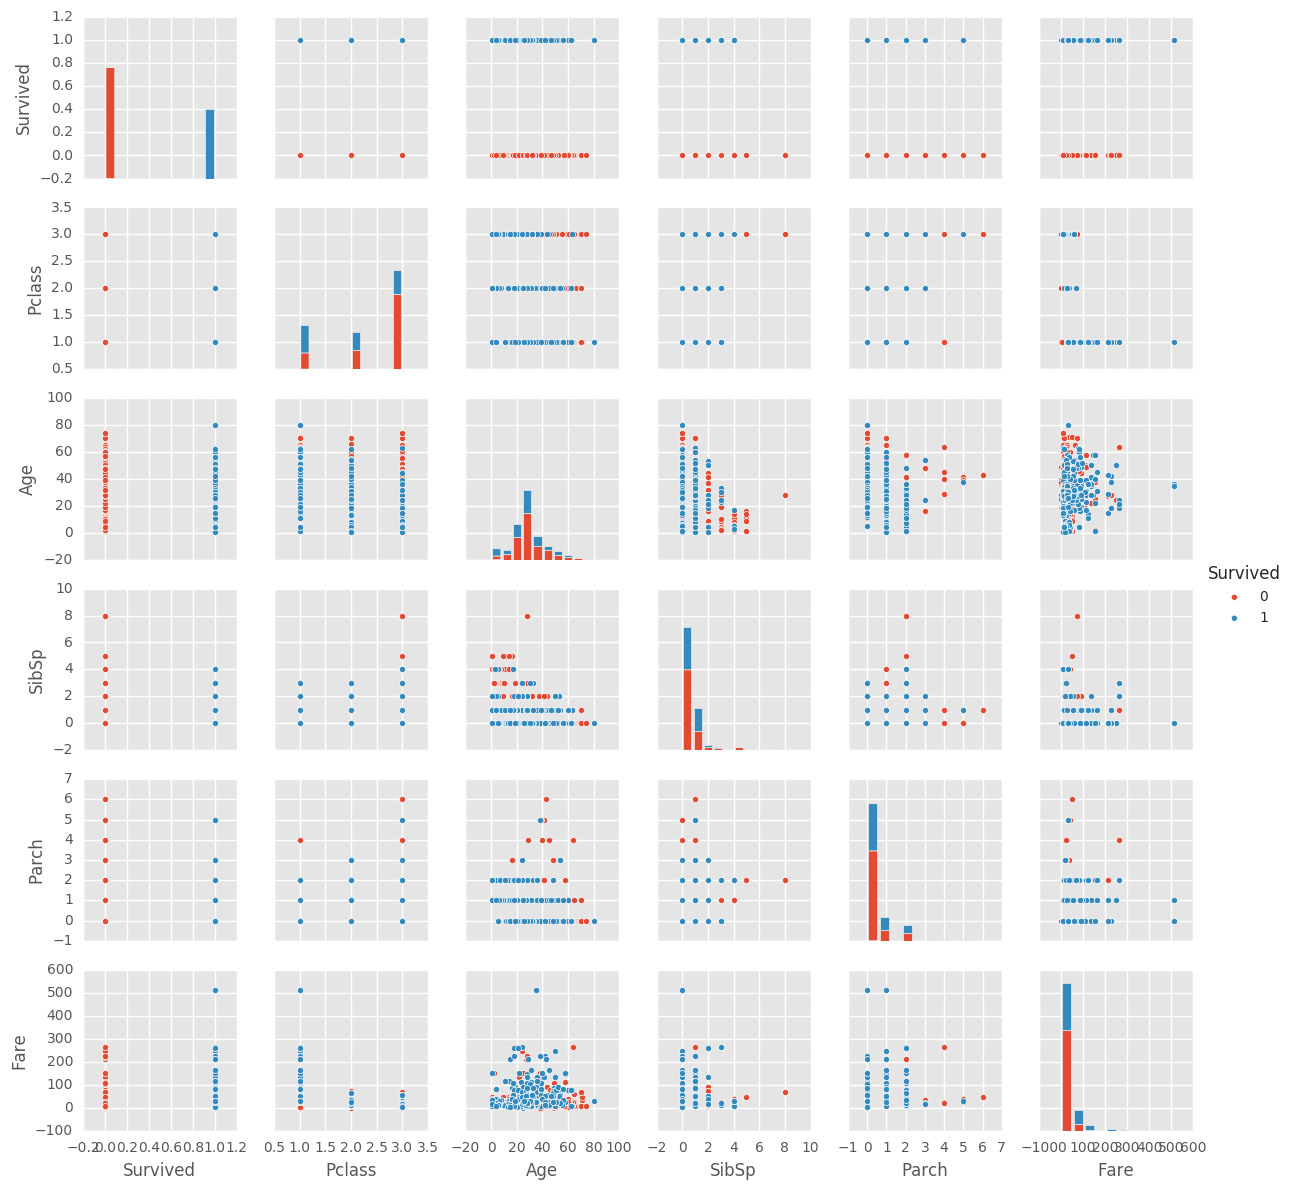

In [449]:
sns.pairplot(data_red,hue='Survived',size=2)

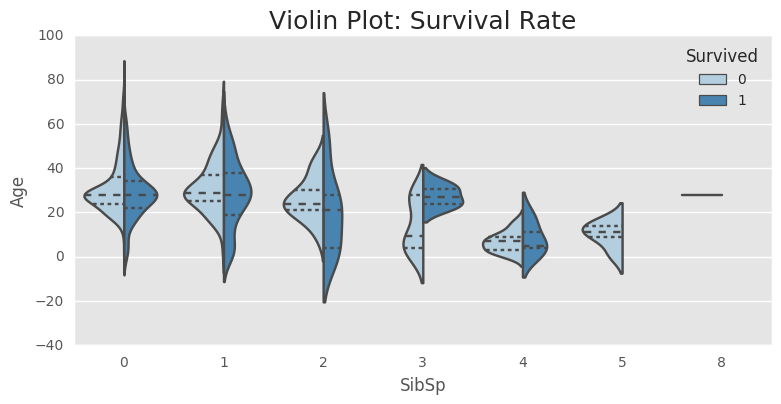

In [450]:
fig, ax = plt.subplots(figsize=(9, 4))
sns.violinplot(x="SibSp", y="Age", hue="Survived",data=data,split=True,\
               inner="quart",palette="Blues")
plt.title('Violin Plot: Survival Rate',fontsize=18)

**Normalize Data**

In [458]:
for c,r in data.iteritems():
    if r.dtype != object:
        data[c] = StandardScaler().fit_transform(data[c].values.reshape(-1,1))
print(data.sum(axis=0))#Mean
print(data.std(axis=0)) #Sdtev

PassengerId   -3.441691e-14
Survived      -2.831069e-14
Pclass        -1.079137e-13
Age            2.243761e-13
SibSp          3.246292e-13
Parch          7.827072e-14
Fare          -3.896883e-14
dtype: float64
PassengerId    1.000562
Survived       1.000562
Pclass         1.000562
Age            1.000562
SibSp          1.000562
Parch          1.000562
Fare           1.000562
dtype: float64


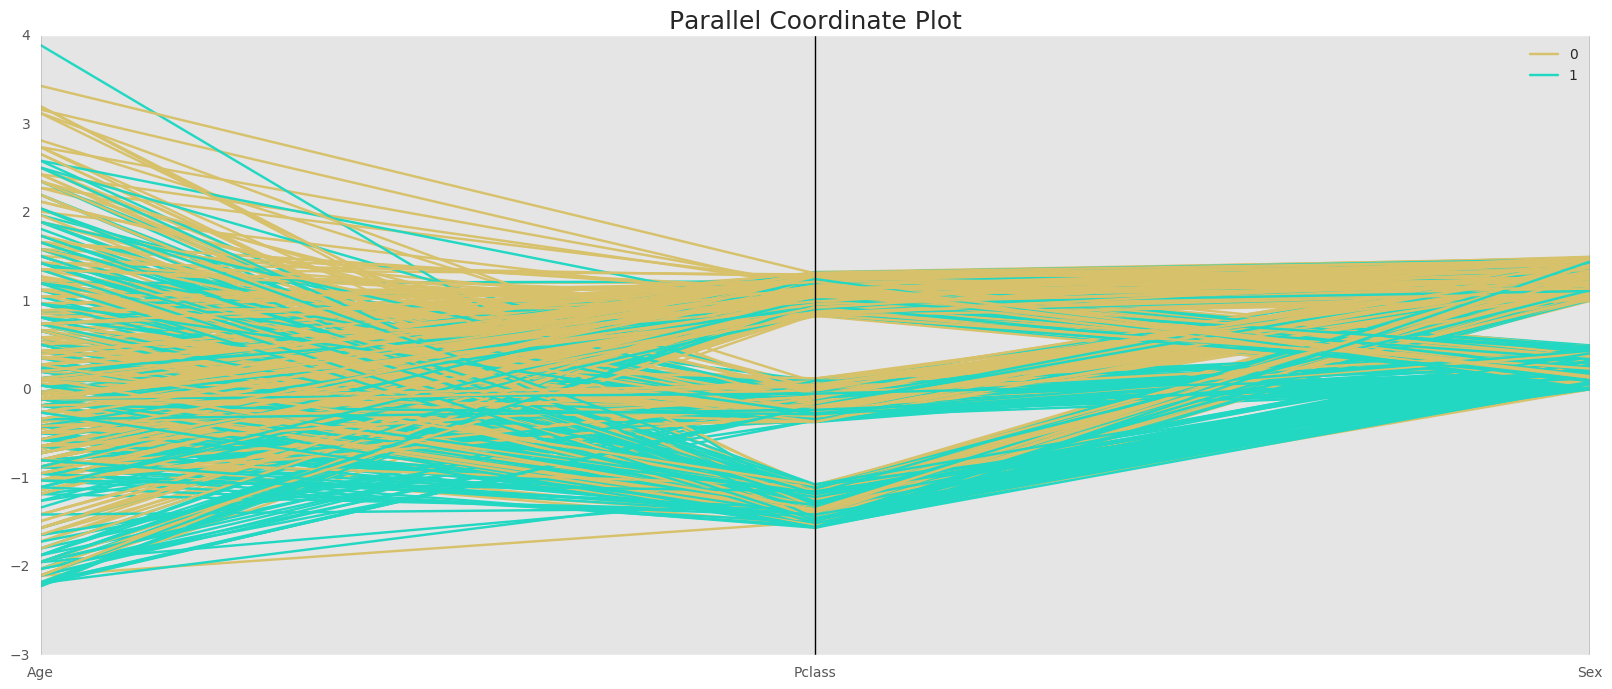

In [463]:
from pandas.tools.plotting import parallel_coordinates

df_sub = data[['Survived','Age','Pclass','Sex']]
df_sub.Sex = df_sub.Sex=='male' 

#Add some noise to separate Pclass better
df_sub.Pclass = df_sub.Pclass+np.random.rand(*df_sub.Pclass.shape)/2
df_sub.Sex = df_sub.Sex+np.random.rand(*df_sub.Sex.shape)/2

plt.figure(figsize=(20,8))
parallel_coordinates(df_sub,'Survived')
plt.legend(['0','1'])
plt.title('Parallel Coordinate Plot',fontsize=18)

**Similarity Matrix**

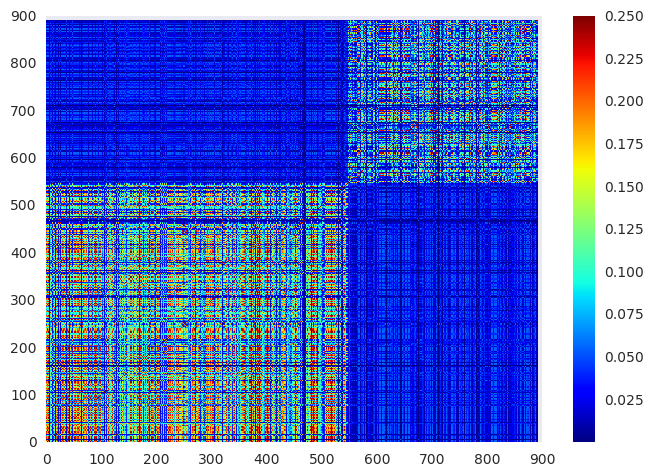

In [479]:
from scipy.spatial import distance
sns.set(rc={'image.cmap': 'jet'})

#Preprocess Steps
df_sub = data[['Survived','Age','Pclass','Fare']]
df_normalized = (df_sub-df_sub.mean())/(df_sub.std())
df_sorted = df_normalized.sort(columns='Survived')


#Compute Euclidean Distance between Vectors (pairwise distances)
Y = distance.pdist(df_sorted, "euclidean")

#squareform converts to full matrix
A = distance.squareform(Y)

# Convert from distance to similarity
S = 0.5/(1+np.exp(A)) 

plt.pcolormesh(S)
plt.colorbar()

**One-Hot Encoding for Categorical Variables**

In [382]:
l = []
for c,r in data.iteritems():
    if r.dtype == object:
        l.append(pd.get_dummies(data[c],prefix='dummy'))
    else:
        l.append(data[c])
data_trans = pd.concat(l,axis=1)